## 1.	Dataset Characteristics and Exploratory Data Analysis

**Analysis of CIC-IDS 2017 Dataset based on the percentages of attack types**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



**2. View Data and Show Analysis on Rows and Columns**

In [4]:
data_test = pd.read_csv(r"C:\VS code projects\data_files\UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")
data_train = pd.read_csv(r"C:\VS code projects\data_files\UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")

In [9]:
# Concatenate the training and testing datasets
data_combined = pd.concat([data_train, data_test], axis=0, ignore_index=True)

# Print the shape of the original and combined datasets
print("Shape of training data:", data_train.shape)
print("Shape of testing data:", data_test.shape)
print("Shape of combined data:", data_combined.shape)

# Display first few rows of combined dataset
print("\nFirst few rows of combined dataset:")
display(data_combined.head())

Shape of training data: (2934817, 19)
Shape of testing data: (733705, 19)
Shape of combined data: (3668522, 19)

First few rows of combined dataset:


,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


C:\Users\Spencer Kanjera\AppData\Local\Temp\ipykernel_6284\3346885003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.index, y=attack_counts.values, palette='viridis')


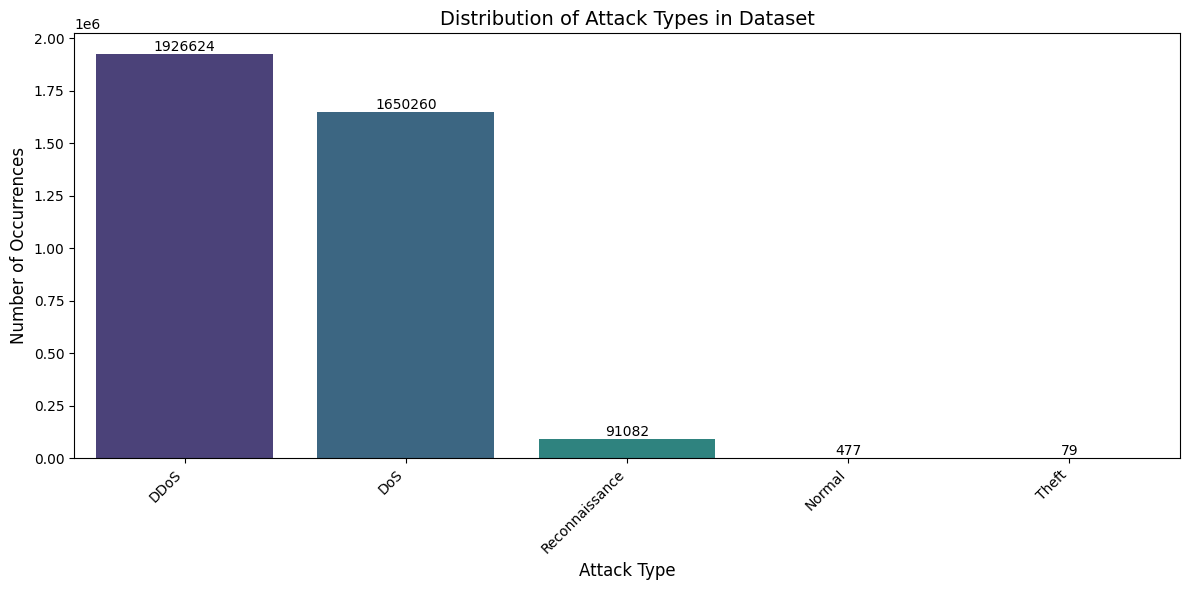


Numerical distribution of attacks:
category
DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: count, dtype: int64

Percentage distribution:
category
DDoS              262.59
DoS               224.92
Reconnaissance     12.41
Normal              0.07
Theft               0.01
Name: count, dtype: float64 %


In [10]:
# Create a bar plot of attack types distribution
plt.figure(figsize=(12, 6))
attack_counts = data_combined['category'].value_counts()

# Create bar plot
sns.barplot(x=attack_counts.index, y=attack_counts.values, palette='viridis')

# Customize the plot
plt.title('Distribution of Attack Types in Dataset', fontsize=14)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(attack_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print numerical distribution
print("\nNumerical distribution of attacks:")
print(attack_counts)
print("\nPercentage distribution:")
print((attack_counts/len(data_test)*100).round(2), "%")

Dropped columns which are non numerical: ['proto', 'saddr', 'sport', 'daddr', 'dport', 'category', 'subcategory']

Features with very low correlation (below threshold 0.1):
pkSeqID             -0.018767
seq                  0.016925
stddev               0.012029
N_IN_Conn_P_SrcIP    0.029041
min                  0.005409
state_number         0.002560
mean                 0.013011
N_IN_Conn_P_DstIP    0.052785
drate               -0.002002
srate               -0.093502
max                  0.015207
Name: attack, dtype: float64

Features sorted by importance (correlation with target variable):
srate                0.093502
N_IN_Conn_P_DstIP    0.052785
N_IN_Conn_P_SrcIP    0.029041
pkSeqID              0.018767
seq                  0.016925
max                  0.015207
mean                 0.013011
stddev               0.012029
min                  0.005409
state_number         0.002560
drate                0.002002
Name: attack, dtype: float64


C:\Users\Spencer Kanjera\AppData\Local\Temp\ipykernel_6284\550897973.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_features.values, y=important_features.index, palette='viridis')


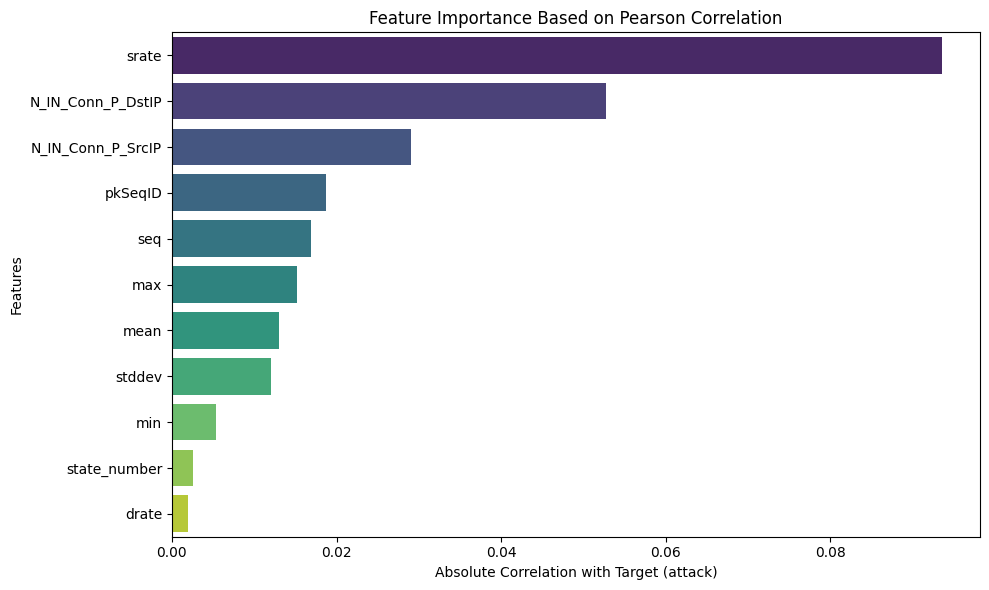

In [11]:
# Drop categorical columns and handle non-numeric data
numerical_data_test = data_combined.copy()

# Detect and drop non-numeric columns (e.g., 'proto', 'category', 'subcategory')
non_numeric_columns = numerical_data_test.select_dtypes(include=['object']).columns
print("Dropped columns which are non numerical:", non_numeric_columns.tolist())  # Print the names of the dropped columns
numerical_data_test = numerical_data_test.drop(columns=non_numeric_columns)

# Compute the correlation matrix for numerical features
correlation_matrix = numerical_data_test.corr(method='pearson')

# Extract correlations with the target variable (e.g., 'attack')
target_correlations = correlation_matrix['attack'].drop('attack')  # Drop the correlation of 'attack' with itself

# Sort features by their absolute correlation values with the target
important_features = target_correlations.abs().sort_values(ascending=False)

# Print features with very low correlation (threshold: 0.1)
low_correlation_features = target_correlations[target_correlations.abs() < 0.1]
print("\nFeatures with very low correlation (below threshold 0.1):")
print(low_correlation_features)

# Print the important features and their correlation values
print("\nFeatures sorted by importance (correlation with target variable):")
print(important_features)

# Optional: Visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=important_features.values, y=important_features.index, palette='viridis')
plt.title('Feature Importance Based on Pearson Correlation')
plt.xlabel('Absolute Correlation with Target (attack)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [12]:
pd.options.display.max_rows = 80
print('Overview of Columns:')
data_combined.describe().transpose()

Overview of Columns:


,count,mean,std,min,25%,50%,75%,max
pkSeqID,3668522.0,1.834262e+06,1.059011e+06,1.0,917131.250000,1.834262e+06,2.751392e+06,3.668522e+06
seq,3668522.0,1.213204e+05,7.579428e+04,1.0,54876.000000,1.177690e+05,1.849300e+05,2.622120e+05
stddev,3668522.0,8.871499e-01,8.037139e-01,0.0,0.030019,7.938960e-01,1.745296e+00,2.496763e+00
N_IN_Conn_P_SrcIP,3668522.0,8.253848e+01,2.439739e+01,1.0,69.000000,1.000000e+02,1.000000e+02,1.000000e+02
min,3668522.0,1.017540e+00,1.483688e+00,0.0,0.000000,0.000000e+00,2.151138e+00,4.980471e+00
state_number,3668522.0,3.134390e+00,1.186971e+00,1.0,3.000000,4.000000e+00,4.000000e+00,1.100000e+01
mean,3668522.0,2.231063e+00,1.517728e+00,0.0,0.181967,2.690125e+00,3.565203e+00,4.981882e+00
N_IN_Conn_P_DstIP,3668522.0,9.245168e+01,1.817643e+01,1.0,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
drate,3668522.0,4.455046e-01,6.028863e+01,0.0,0.000000,0.000000e+00,0.000000e+00,5.882353e+04
srate,3668522.0,2.955111e+00,7.245425e+02,0.0,0.155970,2.837830e-01,4.882010e-01,1.000000e+06
